In [1]:
import pandas as pd

df = pd.read_csv('week_2_dataset.csv')

In [2]:
# look at structure of the data
df

,Song,Artist,Popularity,BPM,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud (Db),Key,Camelot,Artist_Clean,Song_Clean,Genre Tags,lyrics
0,Smalltown Boy,Bronski Beat,3,135,05:03,68,56,53,7,93,0,20,-11,A#/B♭,6B,Bronski Beat,Smalltown Boy,"80s, new wave, synthpop, pop, synth pop",To your soul\nTo your soul\nCry\nCry\nCry\n\nY...
1,I'm Still Standing,Elton John,6,177,03:01,49,93,46,0,79,10,30,-6,A#/B♭ minor,3A,Elton John,I'm Still Standing,"pop, 80s, elton john, rock, classic rock",You could never know what it's like\nYour bloo...
2,Funky Town,Lipps Inc.,6,122,03:59,91,63,0,62,34,0,10,-8,C,8B,Lipps Inc.,Funky Town,"Disco, 80s, pop, 70s, dance",Gotta make a move to a town that's right for m...
3,I'm So Excited,The Pointer Sisters,65,92,03:49,69,86,10,0,69,0,10,-6,G#/A♭,4B,The Pointer Sisters,I'm So Excited,"80s, Disco, pop, dance, soul",Tonight's the night we're gonna make it happen...
4,Cheri Cheri Lady,Modern Talking,82,114,03:46,68,62,46,1,85,0,30,-14,A#/B♭,6B,Modern Talking,Cheri Cheri Lady,"80s, Disco, pop, Modern Talking, dance","Oh, I cannot explain\nEvery time, it's the sam..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,Rock with You - Single Version,Michael Jackson,82,114,03:40,81,54,18,0,85,0,10,-13,C♯/D♭,3B,Michael Jackson,Rock with You,"pop, michael jackson, 80s, Disco, dance","Girl, close your eyes\nLet that rhythm get int..."
4485,You Sexy Thing,Hot Chocolate,75,106,04:04,79,73,52,0,96,0,10,-5,F,7B,Hot Chocolate,You Sexy Thing,"Disco, 70s, funk, soul, pop",I believe in miracles\nWhere're you from?\nYou...
4486,Get It On,T. Rex,72,127,04:22,73,88,18,86,91,0,60,-7,B minor,10A,T. Rex,Get It On,"glam rock, 70s, classic rock, rock, glam","Well, you're dirty and sweet\nClad in black, d..."
4487,Love Really Hurts Without You,Billy Ocean,1,141,02:58,52,91,0,0,96,0,10,-4,F,7B,Billy Ocean,Love Really Hurts Without You,"80s, pop, soul, 70s, Disco",You run around town like a fool and you think ...


In [3]:
df.shape  # (rows, columns)

(4489, 19)

There are 4489 unique songs in the dataset with 19 total columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4489 entries, 0 to 4488
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song          4489 non-null   object
 1   Artist        4489 non-null   object
 2   Popularity    4489 non-null   int64 
 3   BPM           4489 non-null   int64 
 4   Time          4136 non-null   object
 5   Dance         4489 non-null   int64 
 6   Energy        4489 non-null   int64 
 7   Acoustic      4489 non-null   int64 
 8   Instrumental  4489 non-null   int64 
 9   Happy         4489 non-null   int64 
 10  Speech        4489 non-null   int64 
 11  Live          4489 non-null   int64 
 12  Loud (Db)     4489 non-null   int64 
 13  Key           4489 non-null   object
 14  Camelot       4489 non-null   object
 15  Artist_Clean  4489 non-null   object
 16  Song_Clean    4489 non-null   object
 17  Genre Tags    4489 non-null   object
 18  lyrics        4489 non-null   object
dtypes: int

Should we remove those without time? Will we be using time as a feature? Only feature with nulls currently...

In [5]:
df.describe(include='object')

,Song,Artist,Time,Key,Camelot,Artist_Clean,Song_Clean,Genre Tags,lyrics
count,4489,4489,4136,4489,4489,4489,4489,4489,4489
unique,4316,2009,356,24,24,1632,4284,4180,4471
top,Closer,Taylor Swift,03:32,C,8B,Drake,Heaven,Bryson Tiller,"One love, one heart\nLet's get together and fe..."
freq,4,49,46,429,429,66,4,12,2


Looks like I didn't clean this data well enough the first time. Many songs have the same names, but duplicate lyrics are very concerning. I will clean those out and then further investigate the duplicate songs

In [6]:
df[df['lyrics'].duplicated(keep=False)] # find duplicates

,Song,Artist,Popularity,BPM,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud (Db),Key,Camelot,Artist_Clean,Song_Clean,Genre Tags,lyrics
96,Running Up That Hill (A Deal With God),Kate Bush,12,108,04:58,63,55,72,0,20,0,0,-13,A#/B♭ minor,3A,Kate Bush,Running Up That Hill (A Deal With God),"80s, female vocalists, pop, alternative, Kate ...","It doesn't hurt me (Yeah, yeah, yo)\nDo you wa..."
119,What A Feeling,Irene Cara,71,122,04:04,53,73,38,0,60,0,30,-7,A#/B♭,6B,Irene Cara,What A Feeling,"80s, pop, Soundtrack, Disco, dance","First, when there's nothing, but a slow glowin..."
435,On & On,"Cartoon,Daniel Levi",7,174,03:27,46,70,28,0,42,0,10,-5,B,1B,Cartoon,On & On,"electronic, House, moombahton, tropical house,...",Hold me close 'til I get up\nTime is barely on...
771,Take Me to Church,Hozier,83,129,04:01,57,66,63,0,44,0,10,-5,E minor,9A,Hozier,Take Me to Church,"indie, soul, favorite track right now, 2013, i...",My lover's got humour\nShe's the giggle at a f...
798,Ode To Viceroy,Mac DeMarco,0,95,03:53,52,64,24,2,32,0,10,-6,D,10B,Mac DeMarco,Ode To Viceroy,"best of 2012, rock, Lo-Fi, Canadian, 2012",Mac says in an interview that one time he boug...
946,Snow On The Beach (feat. Lana Del Rey),"Taylor Swift,Lana Del Rey",60,110,04:16,66,32,70,0,15,0,10,-14,A,11B,Taylor Swift,Snow On The Beach (feat. Lana Del Rey),"overrated, shit, Trash, garbage, awful","One night, a few moons ago\nI saw flecks of wh..."
1037,Snow On The Beach (feat. More Lana Del Rey),"Taylor Swift,Lana Del Rey",74,110,03:49,66,40,80,0,27,0,10,-11,F#/G♭ minor,11A,Taylor Swift,Snow On The Beach (feat. More Lana Del Rey),"shit, Trash, overrated, garbage, jackson mahomes","One night, a few moons ago\nI saw flecks of wh..."
1104,One Love / People Get Ready,Bob Marley & The Wailers,3,154,02:52,67,51,7,0,94,30,0,-10,F minor,4A,Bob Marley & The Wailers,One Love / People Get Ready,"reggae, roots reggae, 70s, jamaican, Bob Marley","One love, one heart\nLet's get together and fe..."
1233,Take Me To Church,Hozier,86,129,04:01,57,66,64,0,44,0,10,-5,E minor,9A,Hozier,Take Me To Church,"indie, soul, favorite track right now, 2013, i...",My lover's got humour\nShe's the giggle at a f...
1246,Sultans Of Swing,Dire Straits,86,148,05:48,73,79,6,4,93,0,30,-10,F,7B,Dire Straits,Sultans Of Swing,"classic rock, rock, dire straits, 80s, guitar",You get a shiver in the dark\nIt's raining in ...


In [7]:
#removing duplicates with lowest popularity
rows_to_remove = [1480, 2131, 435, 771, 798, 946, 1104, 2024, 1589, 3955, 1362, 1585, 2765, 2539, 3001, 3846, 3990, 4339]  # row numbers (zero-based)
df = df.drop(index=df.index[rows_to_remove])
df = df.reset_index(drop=True)

In [8]:
df

,Song,Artist,Popularity,BPM,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud (Db),Key,Camelot,Artist_Clean,Song_Clean,Genre Tags,lyrics
0,Smalltown Boy,Bronski Beat,3,135,05:03,68,56,53,7,93,0,20,-11,A#/B♭,6B,Bronski Beat,Smalltown Boy,"80s, new wave, synthpop, pop, synth pop",To your soul\nTo your soul\nCry\nCry\nCry\n\nY...
1,I'm Still Standing,Elton John,6,177,03:01,49,93,46,0,79,10,30,-6,A#/B♭ minor,3A,Elton John,I'm Still Standing,"pop, 80s, elton john, rock, classic rock",You could never know what it's like\nYour bloo...
2,Funky Town,Lipps Inc.,6,122,03:59,91,63,0,62,34,0,10,-8,C,8B,Lipps Inc.,Funky Town,"Disco, 80s, pop, 70s, dance",Gotta make a move to a town that's right for m...
3,I'm So Excited,The Pointer Sisters,65,92,03:49,69,86,10,0,69,0,10,-6,G#/A♭,4B,The Pointer Sisters,I'm So Excited,"80s, Disco, pop, dance, soul",Tonight's the night we're gonna make it happen...
4,Cheri Cheri Lady,Modern Talking,82,114,03:46,68,62,46,1,85,0,30,-14,A#/B♭,6B,Modern Talking,Cheri Cheri Lady,"80s, Disco, pop, Modern Talking, dance","Oh, I cannot explain\nEvery time, it's the sam..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,Rock with You - Single Version,Michael Jackson,82,114,03:40,81,54,18,0,85,0,10,-13,C♯/D♭,3B,Michael Jackson,Rock with You,"pop, michael jackson, 80s, Disco, dance","Girl, close your eyes\nLet that rhythm get int..."
4467,You Sexy Thing,Hot Chocolate,75,106,04:04,79,73,52,0,96,0,10,-5,F,7B,Hot Chocolate,You Sexy Thing,"Disco, 70s, funk, soul, pop",I believe in miracles\nWhere're you from?\nYou...
4468,Get It On,T. Rex,72,127,04:22,73,88,18,86,91,0,60,-7,B minor,10A,T. Rex,Get It On,"glam rock, 70s, classic rock, rock, glam","Well, you're dirty and sweet\nClad in black, d..."
4469,Love Really Hurts Without You,Billy Ocean,1,141,02:58,52,91,0,0,96,0,10,-4,F,7B,Billy Ocean,Love Really Hurts Without You,"80s, pop, soul, 70s, Disco",You run around town like a fool and you think ...


In [9]:
from IPython.display import display, HTML

# Your filtered and sorted DataFrame
duplicates = df[df['Song'].duplicated(keep=False)]
duplicates = duplicates[['Song', 'Artist']].sort_values(by='Song')


display(HTML(f"""
<div style="height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px">
{duplicates.to_html(index=False)}
</div>
"""))


Song,Artist
23,Wallice
23,"Mike WiLL Made-It,Miley Cyrus,Wiz Khalifa,Juicy J"
23,NLE Choppa
Afraid,The Neighbourhood
Afraid,Nico
After Hours,The Weeknd
After Hours,The Velvet Underground
Ain't No Sunshine,Bill Withers
Ain't No Sunshine,Michael Jackson
Alive,Empire Of The Sun


The following will be removed as song duplicates with the same artists: apologize (4249), break your heart (2636), sativa (4139). The song Fast Car had three different renditions but will keep only the original and remove: fast car (359, 2971)

In [10]:
rows_to_remove = [4249, 2636, 4139, 359, 2971]  # row numbers (zero-based)
df = df.drop(index=df.index[rows_to_remove])
df = df.reset_index(drop=True)

In [11]:
df.describe(include='object')

,Song,Artist,Time,Key,Camelot,Artist_Clean,Song_Clean,Genre Tags,lyrics
count,4466,4466,4115,4466,4466,4466,4466,4466,4466
unique,4299,2005,356,24,24,1632,4271,4172,4466
top,Heaven,Taylor Swift,03:29,C,8B,Drake,Closer,Bryson Tiller,To your soul\nTo your soul\nCry\nCry\nCry\n\nY...
freq,4,49,45,428,428,66,4,12,1


Will have to figure out what to do with genre tags as the majority of songs have 5 tags. Split them up into individual columns? Aggregate into most common tag? Unsure right now...

Now the difference between unique songs and unique song_clean are also likely duplicates with songs that have recently been "Remastered"

In [12]:
# Group by the cleaned song name
grouped = df.groupby('Song_Clean')['Song'].nunique()

# Filter where more than one distinct 'song' maps to a single 'song_clean'
duplicates = grouped[grouped > 1]

# Now view those entries
df[df['Song_Clean'].isin(duplicates.index)][['Song_Clean', 'Song', 'Artist', 'Popularity']].sort_values(by='Song_Clean')


,Song_Clean,Song,Artist,Popularity
3841,4 AM,4 AM,"2 Chainz,Travis Scott",62
314,4 AM,4 AM - Adam K & Soha Radio Edit,Kaskade,51
3947,Another One Bites The Dust,Another One Bites The Dust,Queen,1
190,Another One Bites The Dust,Another One Bites The Dust - Remastered 2011,Queen,84
180,Babooshka,Babooshka - 2018 Remaster,Kate Bush,65
1900,Babooshka,Babooshka,Kate Bush,61
894,Boys,Boys,Hippo Campus,0
188,Boys,Boys - Summertime Love,Sabrina,66
3579,Dancing In The Flames,Dancing In The Flames,The Weeknd,80
3583,Dancing In The Flames,Dancing In The Flames - Acoustic,The Weeknd,52


Again, will be removing the version with the lowest popularity

In [13]:
rows_to_remove = [314, 3947, 1900, 3583, 120, 1855, 522, 3747, 3684, 2346, 2444, 1516, 2029, 3768, 3942, 1977, 3945, 491, 252, 115, 262, 221]  # row numbers (zero-based)
df = df.drop(index=df.index[rows_to_remove])
df = df.reset_index(drop=True)

Upon further investigation, Key and Camelot seem to be the exact same thing just in different notation. Will run Cramer's V categorical correlation to confirm this, and if score is one will remove Key from the dataset

In [14]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # bias correction
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

cramers_v(df['Key'], df['Camelot'])



np.float64(1.0)

In [15]:
df = df.drop(columns=['Key'])

Decided to remove songs without time

In [16]:
df = df[df['Time'].notnull()]
df = df.reset_index(drop=True)

In [17]:
df.describe()

,Popularity,BPM,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud (Db)
count,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000
mean,55.791941,121.874237,58.752137,64.345543,23.575092,4.231746,52.212698,2.754579,13.645910,-7.638584
std,26.804056,27.528039,14.856005,20.020007,26.478502,14.427971,24.392731,7.332703,14.494129,3.436389
min,0.000000,49.000000,9.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,-26.000000
25%,47.000000,101.000000,49.000000,51.000000,2.000000,0.000000,33.000000,0.000000,0.000000,-10.000000
50%,65.000000,121.000000,59.000000,67.000000,12.000000,0.000000,52.000000,0.000000,10.000000,-7.000000
75%,75.000000,138.000000,69.000000,80.000000,38.000000,0.000000,72.000000,0.000000,20.000000,-5.000000
max,100.000000,219.000000,96.000000,100.000000,99.000000,97.000000,99.000000,80.000000,90.000000,-1.000000


Maybe think about removing instrumental and speech from the feature space as their standard deviations are far higher than their means?

Now will look at distributions of the numeric features, hoping to see somewhat normal distributions for many of these...

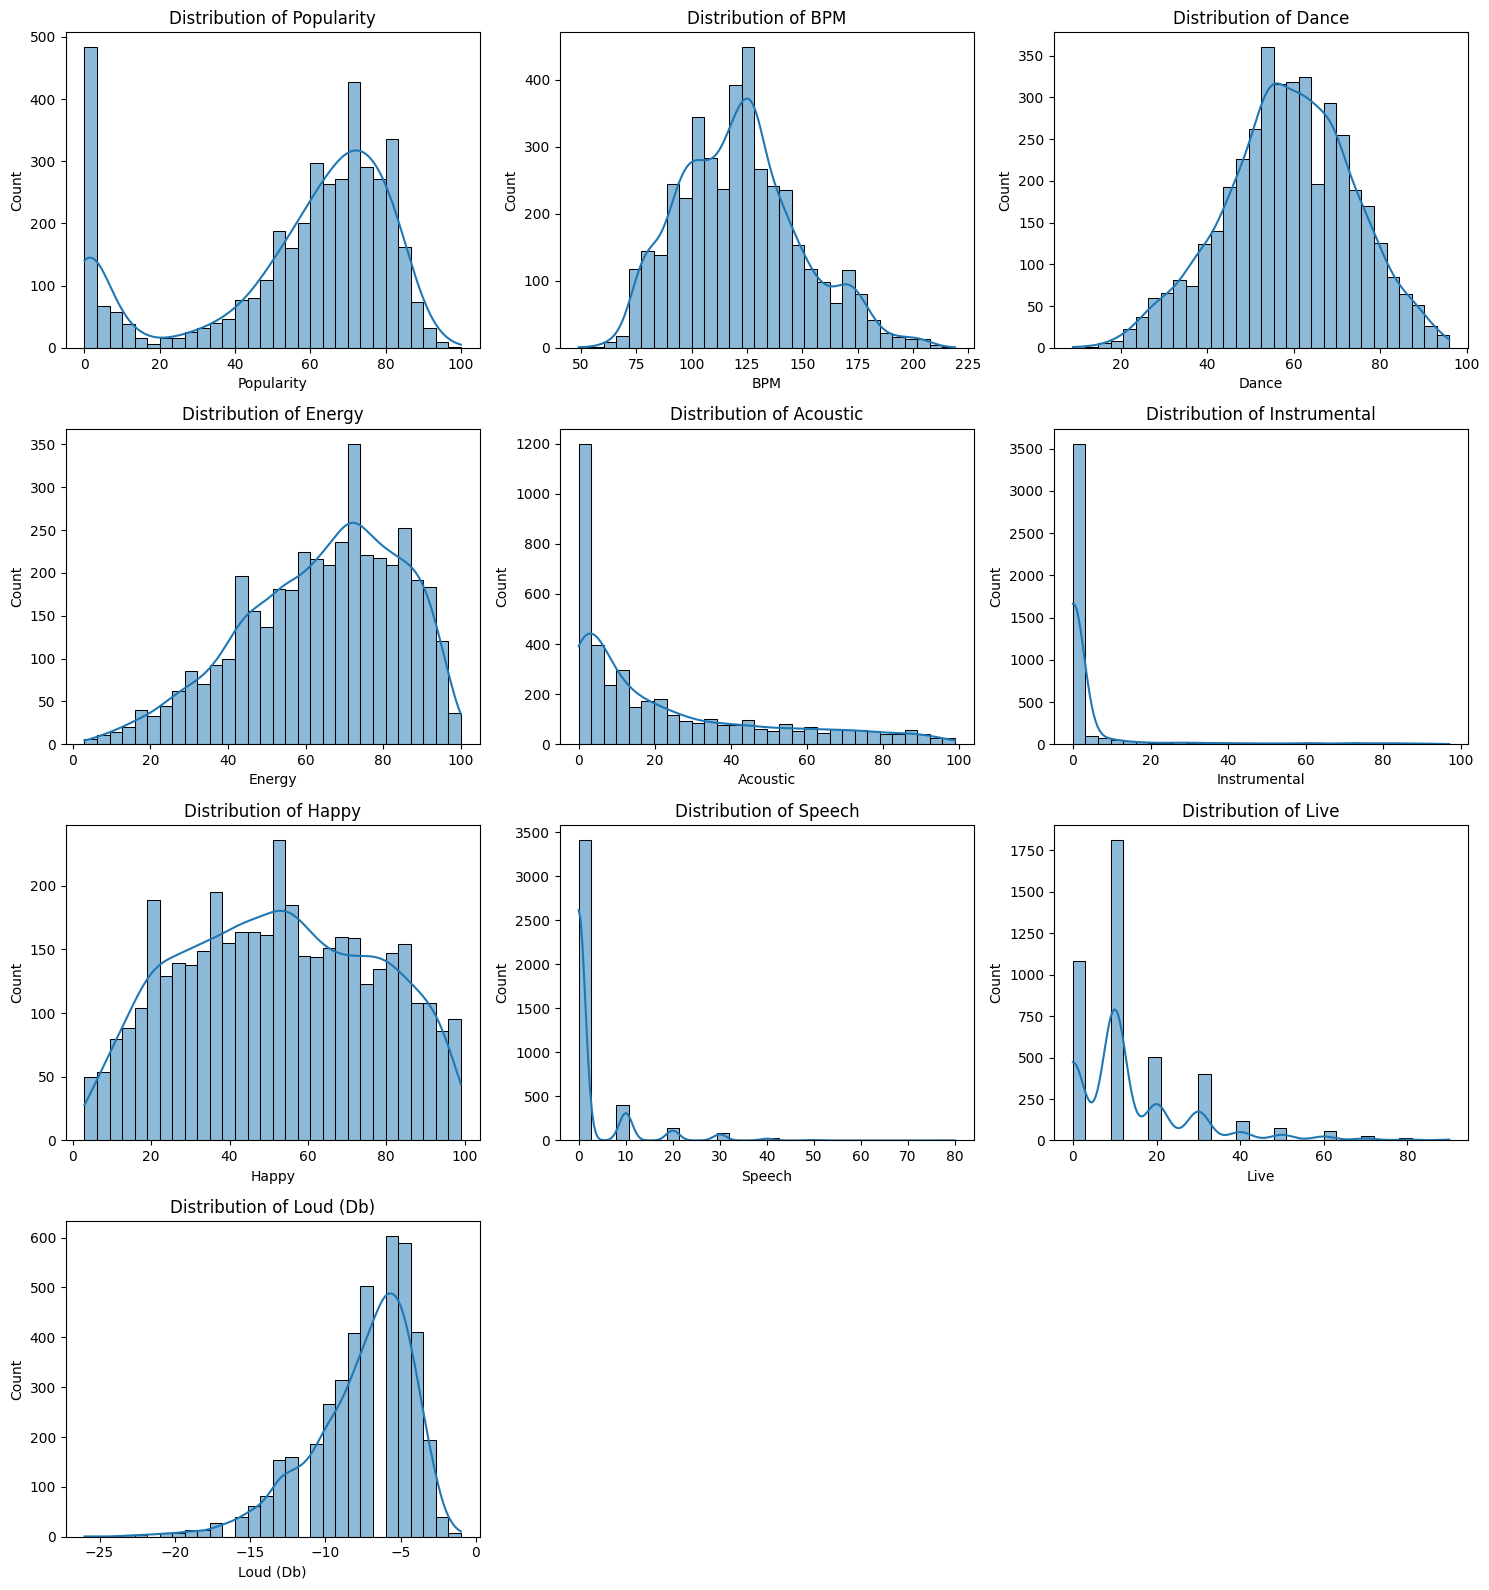

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

# Set up the plotting grid — adjust size as needed
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Getting rid of instrumental and speech as features

In [19]:
df = df.drop(columns=['Instrumental', 'Speech'])

Maybe remove low popularity songs from the set? In looking at the data some very popular songs how low popularity scores and this could heavily skew the model output. Removing songs with a popularity below 15-20 will give us a normal distribution of popularity scores

In [20]:
filtered_songs = df[(df['Popularity'] >= 15) & (df['Popularity'] <= 20)]

# Display relevant columns (you can add/remove columns as needed)
filtered_songs[['Song', 'Artist', 'Popularity']].sort_values(by='Popularity')

,Song,Artist,Popularity
94,Paradise City,Guns N' Roses,15
2741,Sleep On The Floor,The Lumineers,15
516,Take Over Control,"AFROJACK,Eva Simons",15
943,Mary On A Cross,Ghost,15
1968,Lazy Susan,Laura Nyro,15
1033,Blondie,Current Joys,16
1977,Goodbye Joe,Laura Nyro,16
2147,The Limit To Your Love,Feist,16
102,Don't Stop Believin',Journey,17
361,Wake Me Up,Avicii,17


Finally, will look at who is in the data...

In [21]:
top_artists = df['Artist'].value_counts().head(20)

print(top_artists)

Artist
Taylor Swift         43
Morgan Wallen        42
Drake                40
The Weeknd           32
Bryson Tiller        25
Luke Combs           24
Billy Joel           24
Wallows              23
Zach Bryan           20
Bob Dylan            20
ABBA                 17
Arctic Monkeys       16
Kanye West           16
Frank Ocean          16
Coldplay             16
Mitski               15
Avicii               15
Rex Orange County    15
Lana Del Rey         15
Pink Floyd           14
Name: count, dtype: int64


In [22]:
top_artists_clean = df['Artist_Clean'].value_counts().head(20)

print(top_artists_clean)

Artist_Clean
Drake                55
Morgan Wallen        46
Taylor Swift         44
The Weeknd           32
Luke Combs           26
Bryson Tiller        25
Billy Joel           24
Wallows              23
Zach Bryan           20
Bob Dylan            20
Kanye West           20
Frank Ocean          18
ABBA                 17
Coldplay             17
Avicii               17
Rex Orange County    16
Lana Del Rey         16
PARTYNEXTDOOR        16
Arctic Monkeys       16
Martin Garrix        15
Name: count, dtype: int64


In [23]:
top_artists = df['Camelot'].value_counts().head(24)

print(top_artists)

Camelot
8B     393
10B    365
9B     340
11B    292
3B     267
7B     232
10A    175
4B     173
2B     168
12B    160
1B     156
9A     141
6B     141
3A     135
11A    133
8A     129
4A     127
12A    120
6A     104
5A      92
5B      92
1A      64
7A      60
2A      36
Name: count, dtype: int64


Lastly, convert time to a number and view

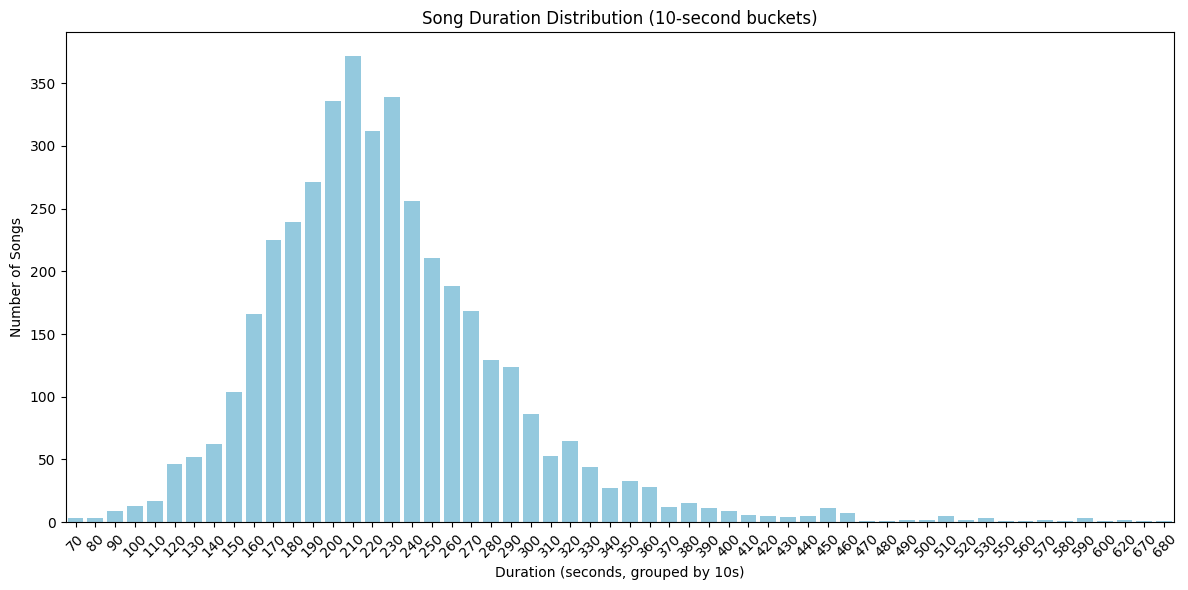

In [24]:
def time_to_seconds(t):
    try:
        minutes, seconds = map(int, t.split(':'))
        return minutes * 60 + seconds
    except:
        return None  # Handle bad formats gracefully

df['time_seconds'] = df['Time'].apply(time_to_seconds)

# Step 2: Create 10-second buckets
df['time_bucket'] = (df['time_seconds'] // 10) * 10

# Step 3: Plot distribution of time buckets
bucket_counts = df['time_bucket'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=bucket_counts.index, y=bucket_counts.values, color='skyblue')
plt.title('Song Duration Distribution (10-second buckets)')
plt.xlabel('Duration (seconds, grouped by 10s)')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
df.shape

(4095, 18)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song          4095 non-null   object
 1   Artist        4095 non-null   object
 2   Popularity    4095 non-null   int64 
 3   BPM           4095 non-null   int64 
 4   Time          4095 non-null   object
 5   Dance         4095 non-null   int64 
 6   Energy        4095 non-null   int64 
 7   Acoustic      4095 non-null   int64 
 8   Happy         4095 non-null   int64 
 9   Live          4095 non-null   int64 
 10  Loud (Db)     4095 non-null   int64 
 11  Camelot       4095 non-null   object
 12  Artist_Clean  4095 non-null   object
 13  Song_Clean    4095 non-null   object
 14  Genre Tags    4095 non-null   object
 15  lyrics        4095 non-null   object
 16  time_seconds  4095 non-null   int64 
 17  time_bucket   4095 non-null   int64 
dtypes: int64(10), object(8)
memory usage: 576.0+ KB


In [27]:
df.to_csv('week_2_final_dataset.csv', index=False)